<a href="https://colab.research.google.com/github/FIlipeRBLuz/ChatGPT-Prompt-Engineering/blob/main/DLI_ElainAI_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#pip install layoutparser torchvision && pip install "detectron2@git+https://github.com/facebookresearch/detectron2.git@v0.5#egg=detectron2"

In [26]:
# pip install pdf2img

In [27]:
#pip install python-poppler

In [28]:
#!apt-get install poppler-utils

In [29]:
import pdf2image
import numpy as np


In [46]:
pdf_file= '/content/exel20160331exhibit103-ame.pdf'
img = np.asarray(pdf2image.convert_from_path(pdf_file)[3])

In [47]:
import layoutparser as lp

model = lp.Detectron2LayoutModel('lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.5],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})

  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


In [48]:
layout_result = model.detect(img)

In [49]:
print(layout_result)

Layout(_blocks=[TextBlock(block=Rectangle(x_1=107.48779296875, y_1=127.61237335205078, x_2=1582.557373046875, y_2=457.218505859375), text=None, id=None, type=Text, parent=None, next=None, score=0.9579065442085266), TextBlock(block=Rectangle(x_1=128.5582275390625, y_1=1763.9881591796875, x_2=1568.9964599609375, y_2=1831.3162841796875), text=None, id=None, type=Text, parent=None, next=None, score=0.9419629573822021), TextBlock(block=Rectangle(x_1=121.82213592529297, y_1=1173.7110595703125, x_2=1542.54443359375, y_2=1597.1683349609375), text=None, id=None, type=Text, parent=None, next=None, score=0.9188989996910095), TextBlock(block=Rectangle(x_1=109.28860473632812, y_1=480.0255432128906, x_2=1572.2972412109375, y_2=768.1053466796875), text=None, id=None, type=Text, parent=None, next=None, score=0.9103321433067322), TextBlock(block=Rectangle(x_1=109.92737579345703, y_1=985.138916015625, x_2=1557.804931640625, y_2=1151.029296875), text=None, id=None, type=Text, parent=None, next=None, scor

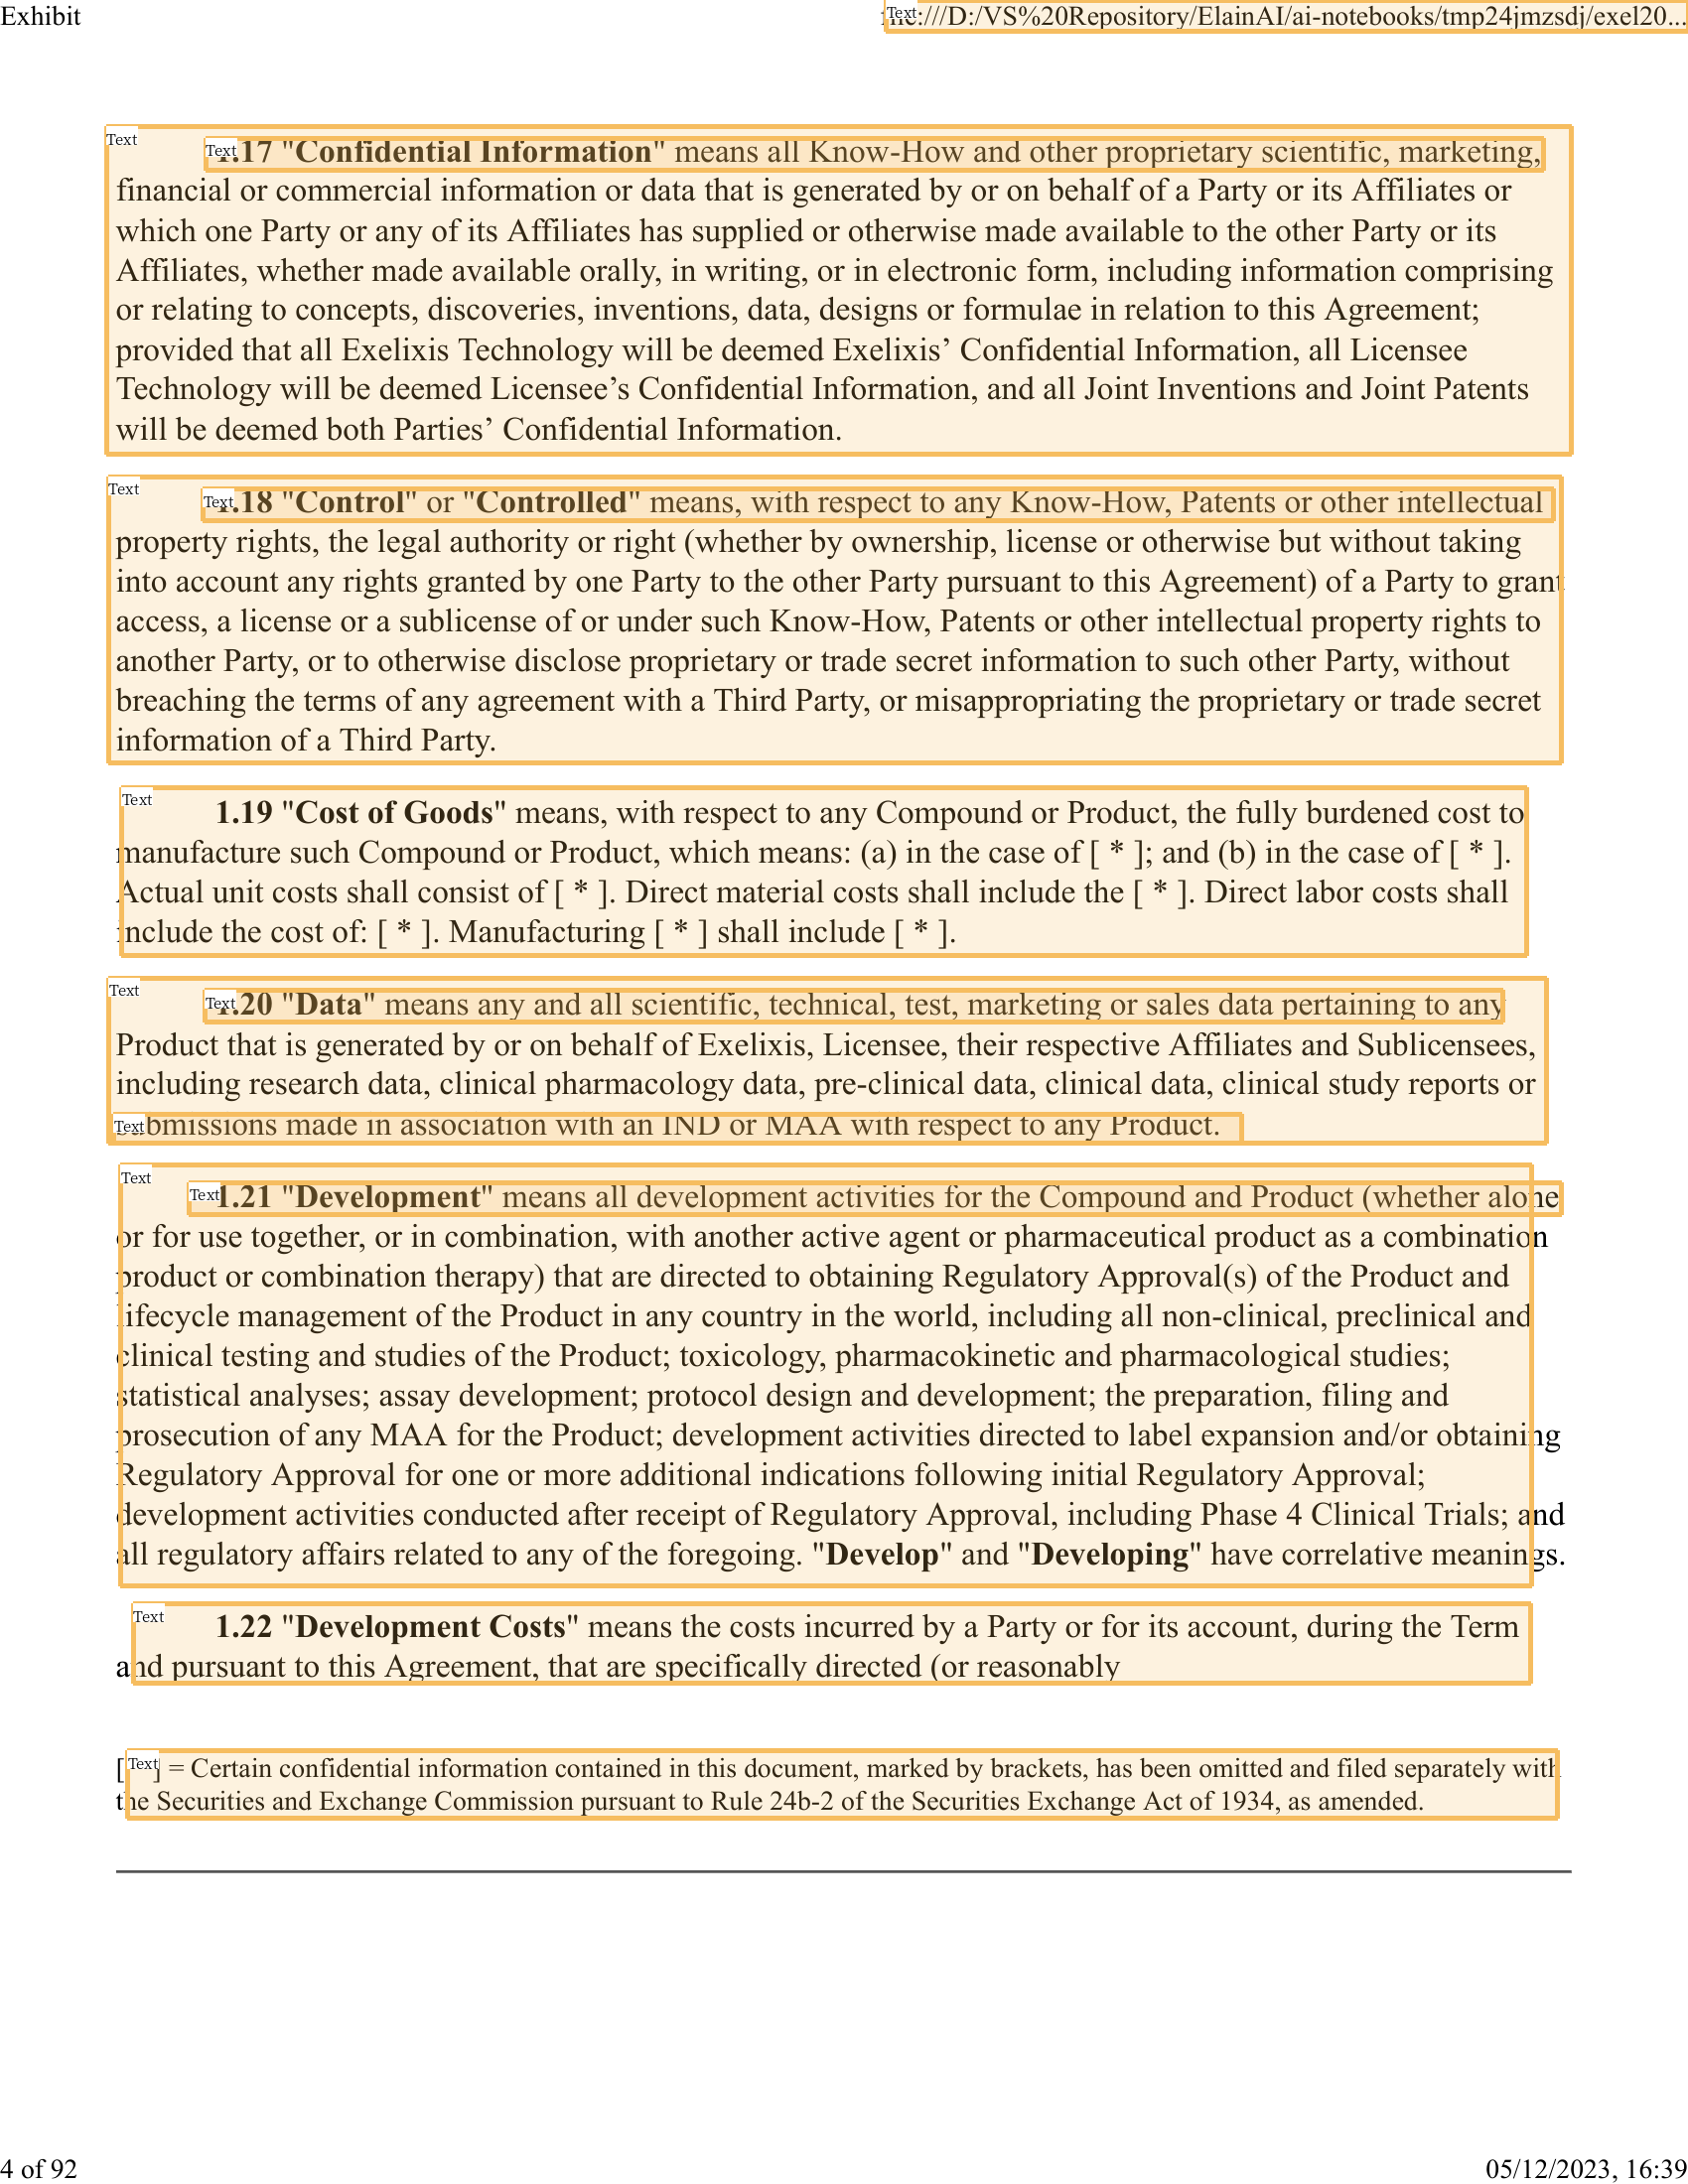

In [50]:
lp.draw_box(img, layout_result,  box_width=5, box_alpha=0.2, show_element_type=True)

In [51]:
text_blocks = lp.Layout([b for b in layout_result if b.type=='Text'])

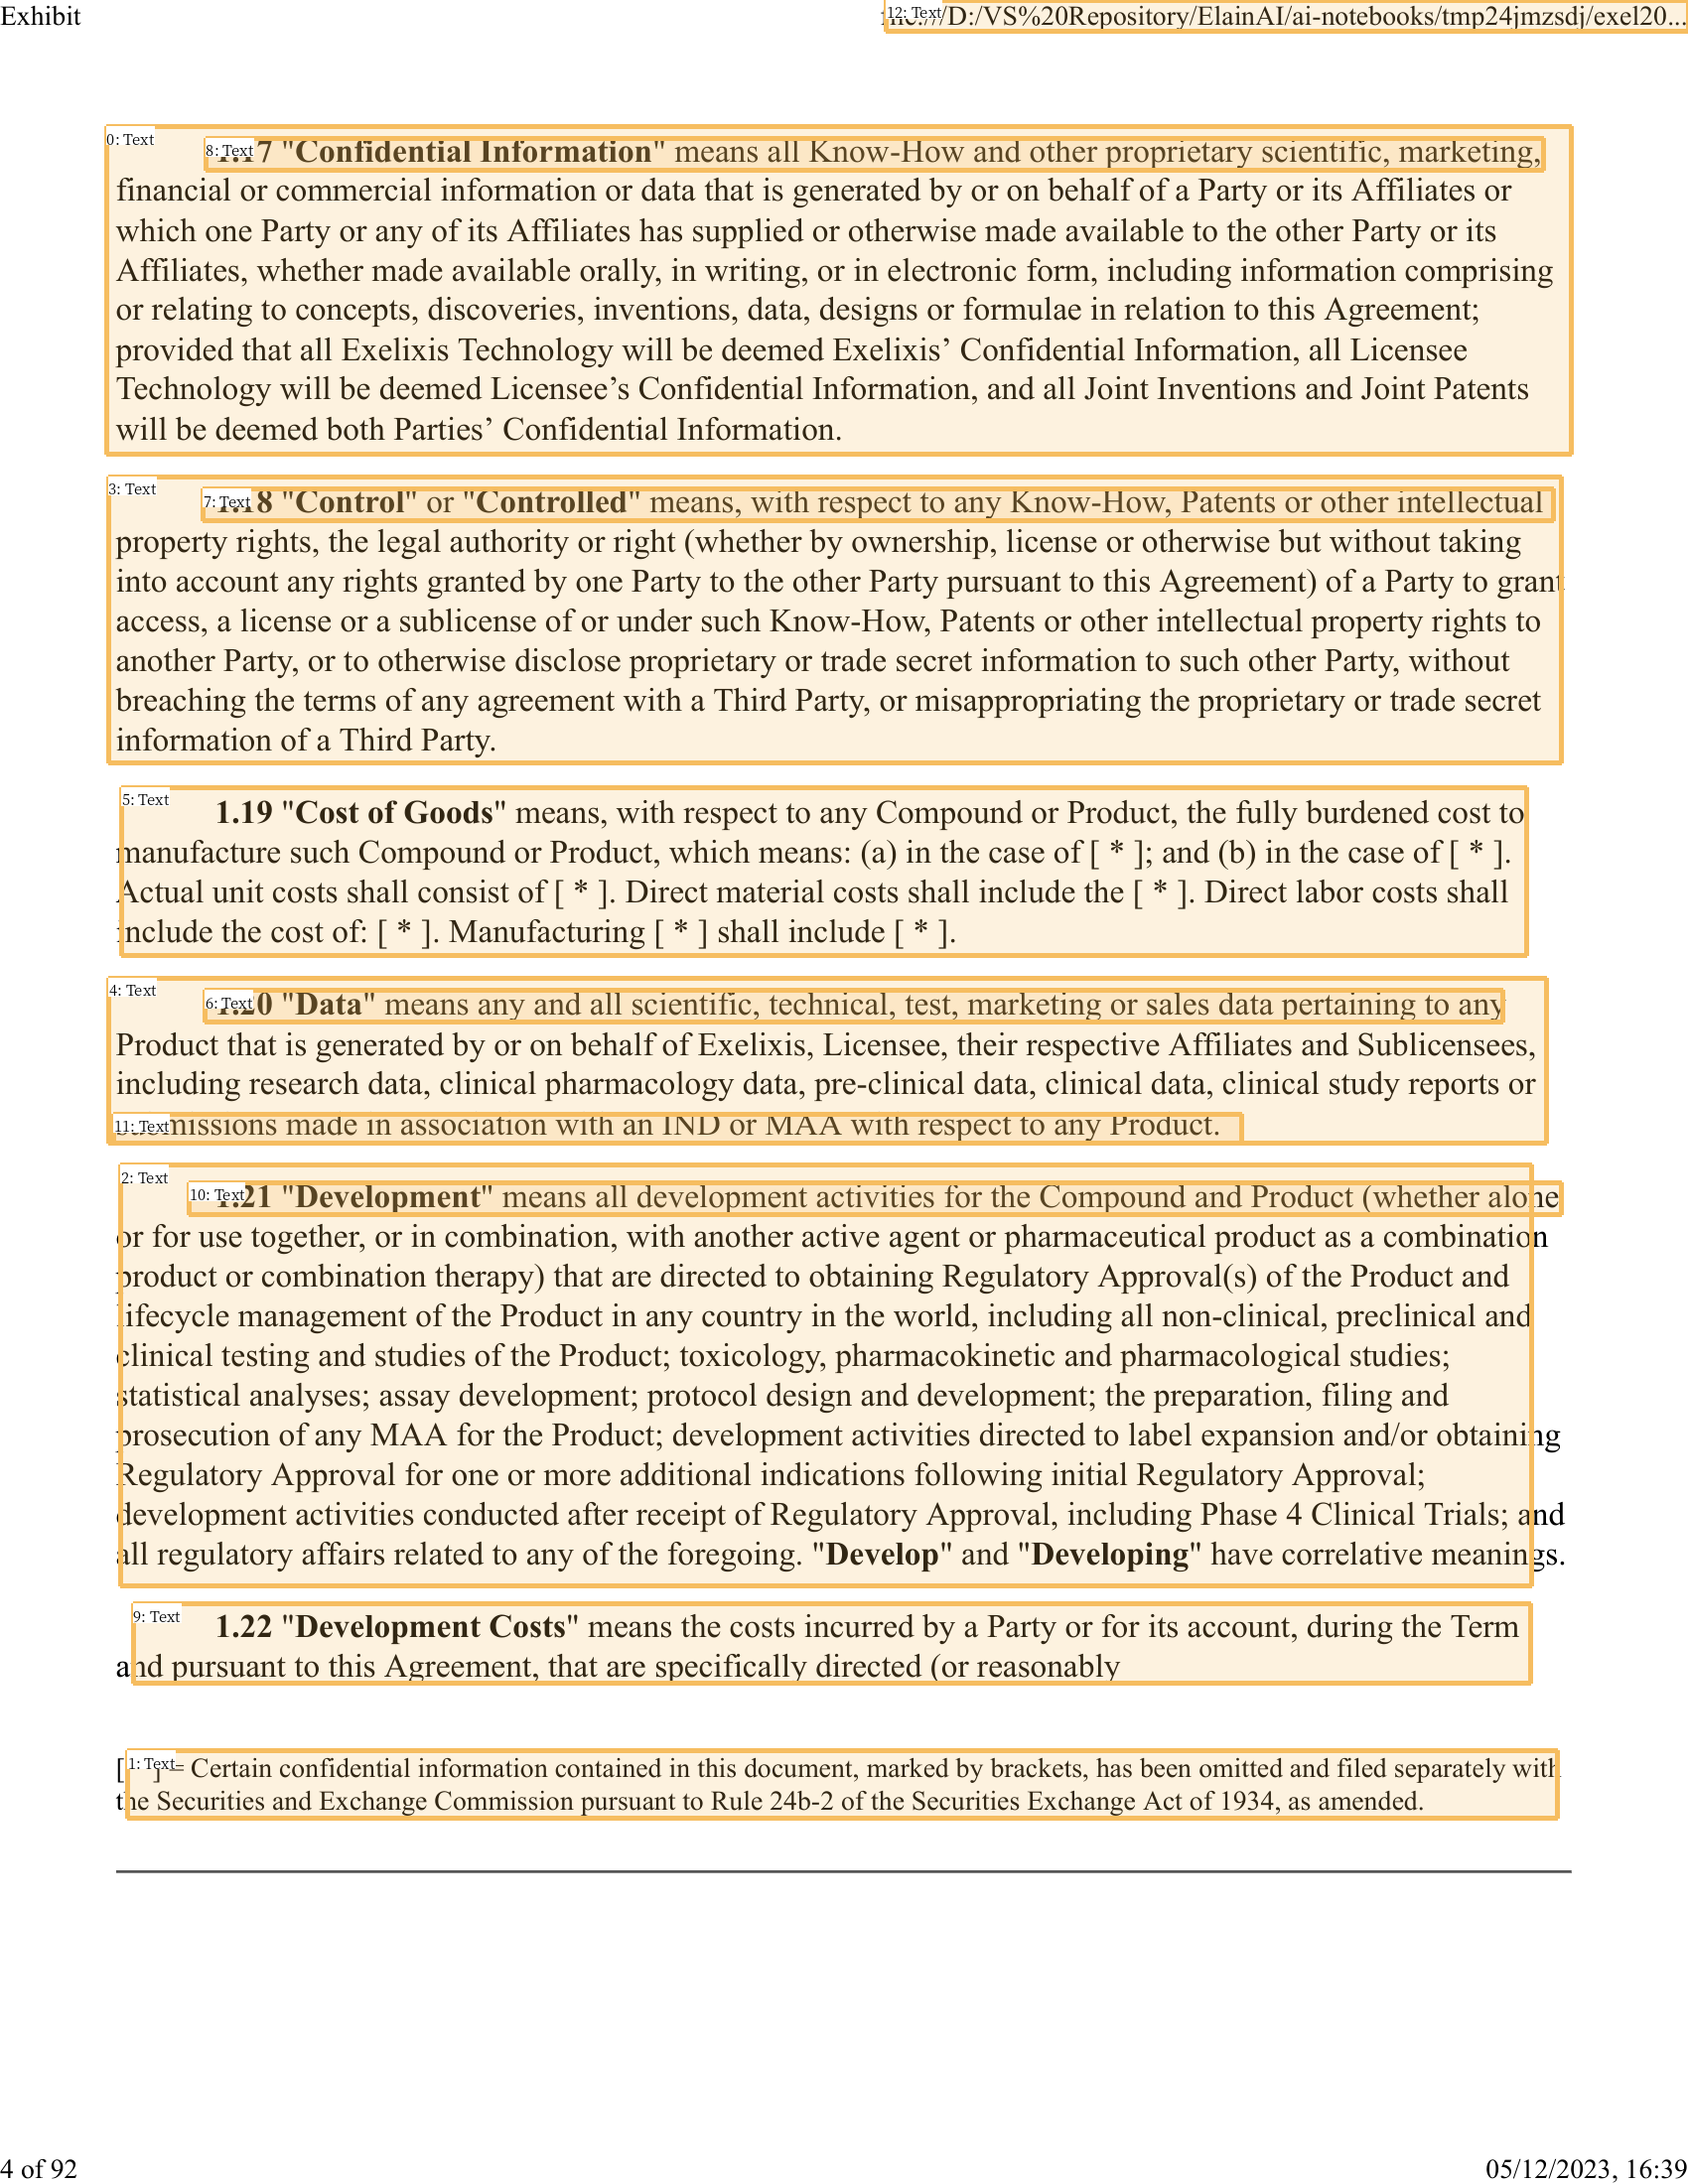

In [52]:
lp.draw_box(img, text_blocks,  box_width=5, box_alpha=0.2, show_element_type=True, show_element_id=True)

In [37]:
## OCR Parser

In [38]:
#pip install "layoutparser[ocr]"

In [39]:
#!sudo apt install tesseract-ocr
#sudo apt install libtesseract-dev

In [53]:
image_width = len(img[0])

# Sort element ID of the left column based on y1 coordinate
left_interval = lp.Interval(0, image_width/2, axis='x').put_on_canvas(img)
left_blocks = text_blocks.filter_by(left_interval, center=True)._blocks
left_blocks.sort(key = lambda b:b.coordinates[1])

# Sort element ID of the right column based on y1 coordinate
right_blocks = [b for b in text_blocks if b not in left_blocks]
right_blocks.sort(key = lambda b:b.coordinates[1])

# Sort the overall element ID starts from left column
text_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])

In [54]:
#!pip install layoutparser
#!pip install "layoutparser[ocr]"
!pip install pytesseract

In [55]:
ocr_agent = lp.TesseractAgent(languages='eng')

In [56]:
ocr_agent

In [57]:
for block in text_blocks:

  # Crop image around the detected layout
  segment_image = (block
                      .pad(left=15, right=15, top=5, bottom=5)
                      .crop_image(img))

  # Perform OCR
  text = ocr_agent.detect(segment_image)

  # Save OCR result
  block.set(text=text, inplace=True)

In [58]:
for txt in text_blocks:
    print(txt.text, end='\n---\n')

1.17 "Confidential Information" means all Know-How and other proprietary scientific, marketing,
financial or commercial information or data that is generated by or on behalf of a Party or its Affiliates or
which one Party or any of its Affiliates has supplied or otherwise made available to the other Party or its
Affiliates, whether made available orally, in writing, or in electronic form, including information comprising
or relating to concepts, discoveries, inventions, data, designs or formulae in relation to this Agreement;
provided that all Exelixis Technology will be deemed Exelixis’ Confidential Information, all Licensee
Technology will be deemed Licensee’s Confidential Information, and all Joint Inventions and Joint Patents
will be deemed both Parties’ Confidential Information.

---
1.18 "Control" or "Controlled" means, with respect to any Know-How, Patents or other intellectual
property rights, the legal authority or right (whether by ownership, license or otherwise but without